In this Multiclass Classification we have performed two machine learning models which are Logistic Regression and
KKN on the IRIS dataset 

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [5]:
X = iris.data
Y = iris.target

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [51]:
iris_data = DataFrame(X,columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [49]:
iris_data

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
iris_target = DataFrame(Y,columns = ['Species'])

In [10]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [14]:
def flower(num):
    if num == 0:
        return 'setosa'
    elif num == 1:
        return 'versicolor'
    else:
        return 'virginicia'

In [15]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [16]:
iris_target['Species'].head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [18]:
iris_data

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [20]:
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginicia
146,6.3,2.5,5.0,1.9,virginicia
147,6.5,3.0,5.2,2.0,virginicia
148,6.2,3.4,5.4,2.3,virginicia


D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


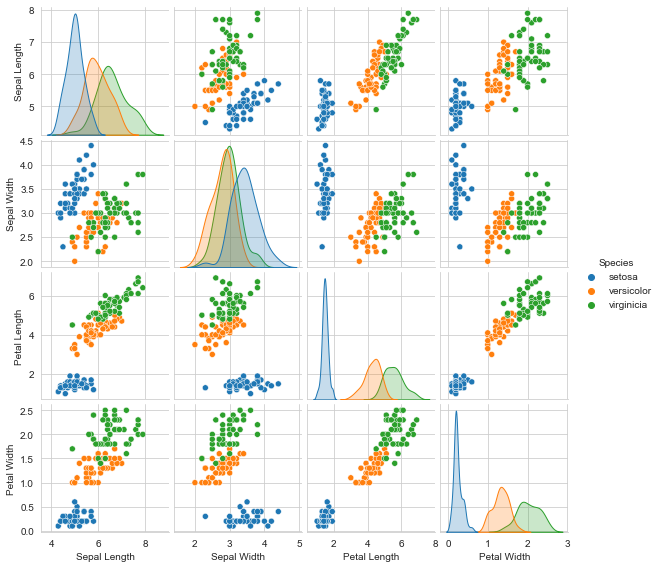

In [21]:
sns.pairplot(iris,hue = 'Species',size = 2)

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


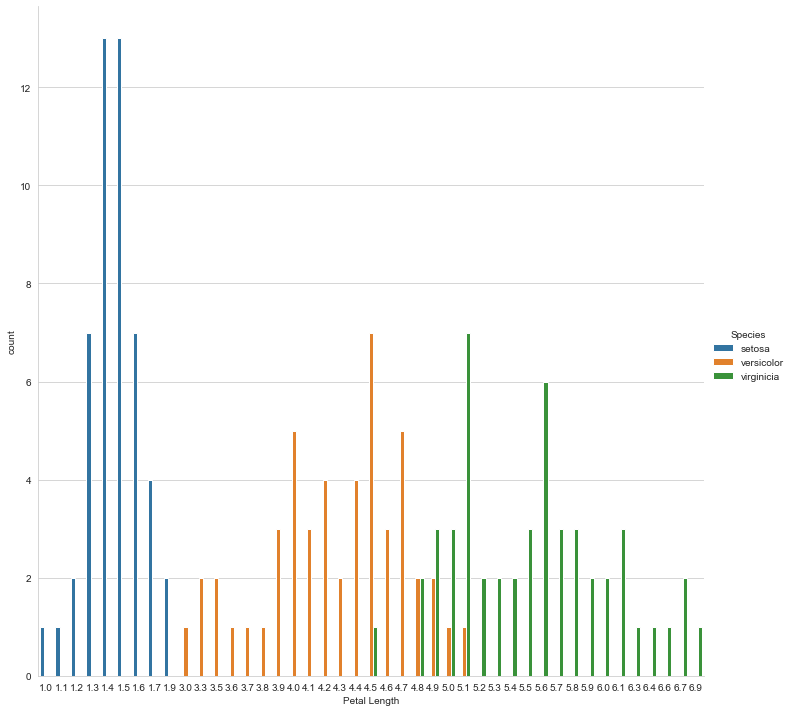

In [24]:
#sns.factorplot('Petal Length',data=iris,hue = 'Species',size = 10)
sns.factorplot('Petal Length',data=iris,hue='Species',size=10,kind = 'count')

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
logreg = LogisticRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.4,random_state=3)

In [29]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [30]:
from sklearn import metrics

In [31]:
Y_pred = logreg.predict(X_test)

In [32]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [35]:
from sklearn.neighbors import KNeighborsClassifier



In [36]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [37]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [39]:
Y_pred = knn.predict(X_test)

In [41]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


In [42]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [43]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
Y_pred = knn.predict(X_test)

In [46]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [47]:
k_range = range(1, 21)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0, 0.5, 'Testing Accuracy')

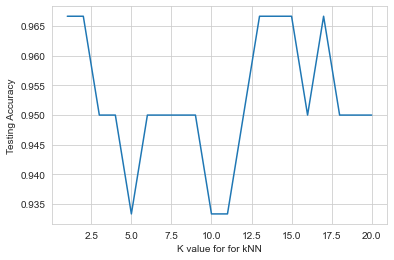

In [48]:
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')